In [1]:
import sympy as sm
import numpy as np

def pkn(pk, k, n, vL): 
    if k not in get_u(vL, n): 
        return 0
    elif n == 1: 
        try:
            return pk[k-1]  
        except:
            return 0
    else: 
        return sum([pkn(pk, i, n-1, vL)*pkn(pk, k-i, 1, vL) for i in range(0, k+1)]) 
                                                                                     

def get_u(vL, n):  
    max_v = max(vL)
    min_v = min(vL)
    return list(range(n*min_v, n*max_v+1))

def system(N=3, L=3, lambda_ = 0.2, mu = 0.7): 
    vL = [i for i in range(1, L+1)] 
    qN = {j:{i:sm.symbols(f'q{j}({i})') for i in get_u(vL, j)} for j in range(N+1)}  
    pi = [0.6, 0.3, 0.1]
    
    equations = []
    
    sum_for_eq = []
    for l in range(1, L+1):
        sum_for_eq.append(vL[l-1] * qN[1][l]) 
    first_eq = qN[0][0] * lambda_ - mu * sum(sum_for_eq)

    equations.append(first_eq)
      
    for n in range(1, N):
        
        for u in get_u(vL, n):
            
            left = (lambda_ + (mu * u / n)) * qN[n][u] 
            
            sum1_for_eq = []
            for v in range(0, u+1):
                try:
                    sum1_for_eq.append(pkn(pi, u - v, 1, vL)*qN[n-1][v])
                except:
                    sum1_for_eq.append(0)
       
            sum2_for_eq = []
            for v in range(u+1, u+L+1):
                if pkn(pi, u, n, vL)*pkn(pi, v-u, 1, vL) == 0 or pkn(pi, v, n+1, vL) == 0:
                    sum2_for_eq.append(0)
                else:
                    sum2_for_eq.append(v*qN[n+1][v]*pkn(pi, u, n, vL)*pkn(pi, v-u, 1, vL)/pkn(pi, v, n+1, vL))

            
            eq = left - (lambda_ * sum(sum1_for_eq)) - (mu/(n+1) * sum(sum2_for_eq))
            equations.append(eq)
    for u in get_u(vL,N):
        last_sum = []
        for v in range(0, u+1):
            try:
                last_sum.append(pkn(pi, u-v, 1, vL)*qN[N-1][v])
            except:
                last_sum.append(0)
        
        last_eq = mu*u/N * qN[N][u] - lambda_ *  sum(last_sum)
        equations.append(last_eq)
    qN_g = [[sm.symbols(f'q{j}({i})') for i in get_u(vL, j)] for j in range(N+1)]
    l = []
    for i in range(len(qN_g)):
        l = l + qN_g[i]
    equations[0] = sum(l) - 1
    solved = sm.solve(equations)
    Q = 0 
    for i in get_u(vL, N):
        Q = Q + solved[sm.symbols(f"q{N}({i})")] 
    B_list = []
    for i in range(1, N+1)  :  
        B_list.append([i * qN[i][j] for j in get_u(vL, i)])
    l = []
    for i in B_list:
        l += i
    B = sum(l).subs(solved)
    W = B / lambda_
    return Q, B, W

In [2]:
np.linspace(0.1,1,10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [3]:
lambda_temp = np.linspace(0.1,1,10)
Q = []
B = []
W = []
for lambda_ in lambda_temp:
    q_temp, b_temp, w_temp = system(lambda_=lambda_)
    Q.append(q_temp)
    B.append(b_temp)
    W.append(w_temp)

In [4]:
Q

[0.00122169784727870,
 0.00842713770567741,
 0.0242830289183677,
 0.0487725367616019,
 0.0803205943603116,
 0.116755833314360,
 0.155947944008830,
 0.196126224518098,
 0.235972599178984,
 0.274590987622005]

In [5]:
B

[0.124389415680734,
 0.273632577370145,
 0.442587320394929,
 0.622665267586160,
 0.805026038672945,
 0.982448322316236,
 1.14997990455047,
 1.30480521370413,
 1.44577066829899,
 1.57285686431767]

In [6]:
W

[1.24389415680734,
 1.36816288685072,
 1.47529106798310,
 1.55666316896540,
 1.61005207734589,
 1.63741387052706,
 1.64282843507210,
 1.63100651713016,
 1.60641185366554,
 1.57285686431767]

In [7]:
lambda_temp

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20, 10
plt.style.use('dark_background')

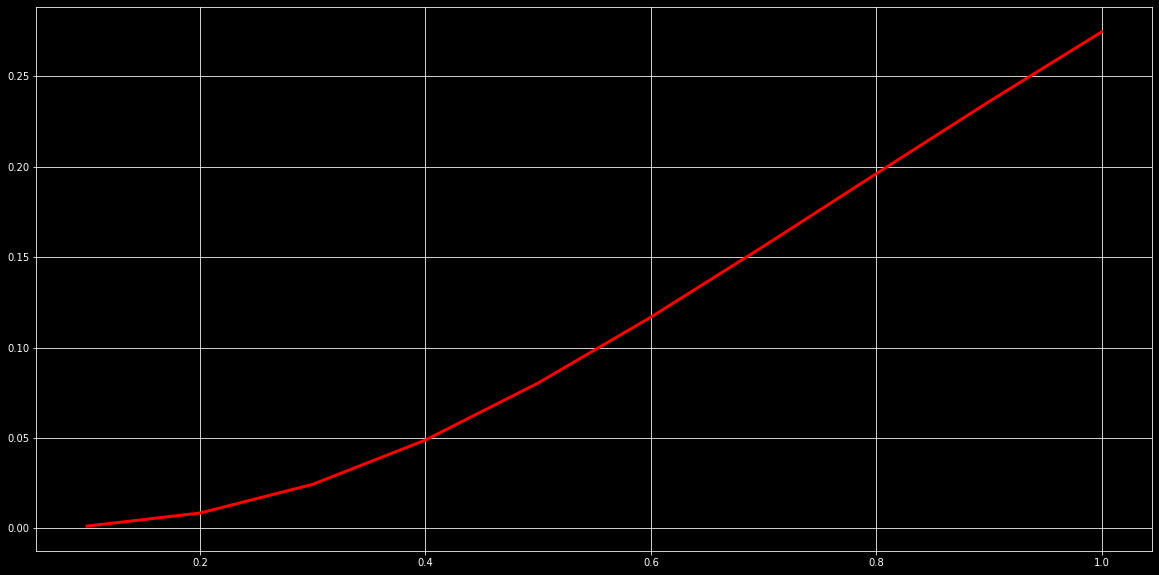

In [13]:
plt.plot(lambda_temp, Q, linewidth = 3, c ='r')
plt.grid()

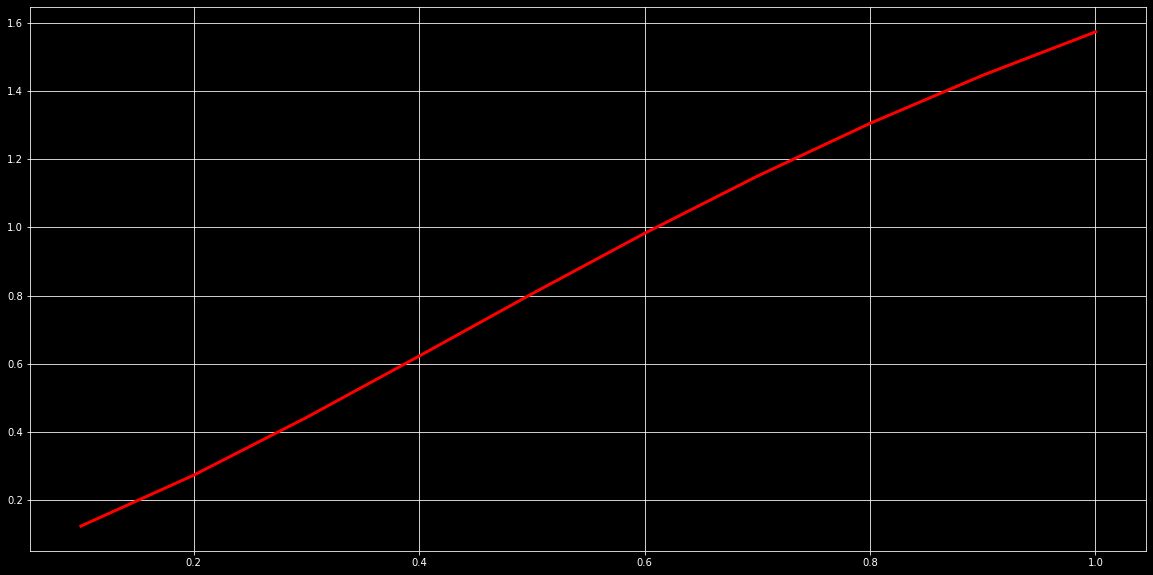

In [14]:
plt.plot(lambda_temp, B, linewidth = 3, c = 'r')
plt.grid()

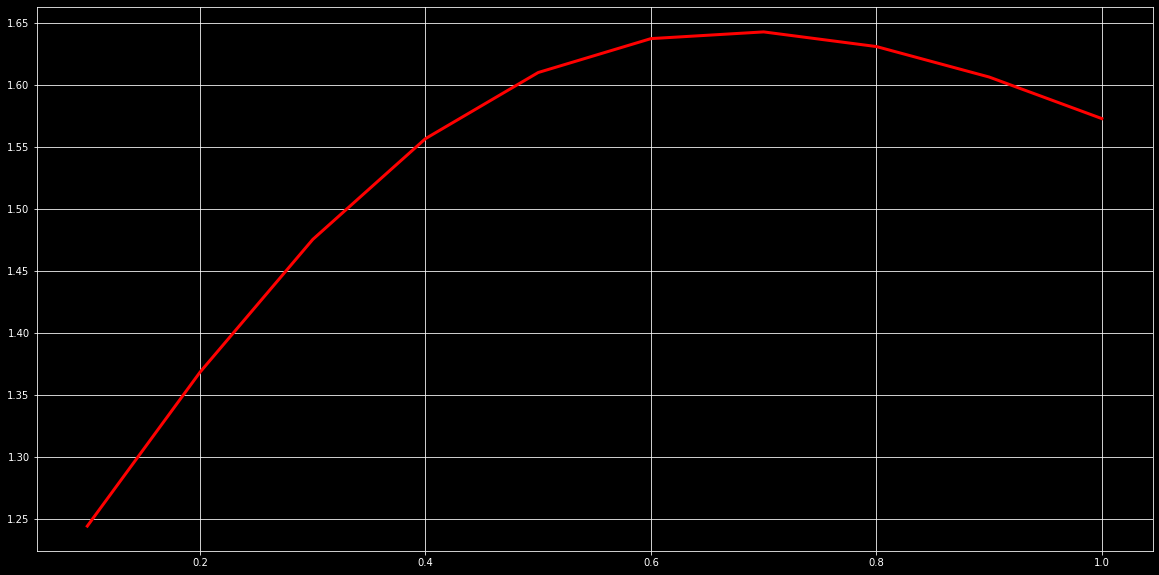

In [15]:
plt.plot(lambda_temp, W, linewidth = 3, c = 'r')
plt.grid()